<a href="https://colab.research.google.com/github/BenjamTorr/TDA_DeepL_TimeSeries/blob/main/Thorax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U giotto-tda

In [ ]:
import numpy as np
from scipy.io import arff
import pandas as pd
import plotly.express as px 
import gtda
from gtda.time_series import TakensEmbedding
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import BettiCurve
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight

In [ ]:
def load():

  #Subimos los datos de entrenamiento
  data_trainX = arff.loadarff('/content/drive/MyDrive/Data-Time_Series/Thorax/NonInvasiveFetalECGThorax1_TRAIN.arff')
  data_trainY = arff.loadarff('/content/drive/MyDrive/Data-Time_Series/Thorax/NonInvasiveFetalECGThorax2_TRAIN.arff')
  df_trainX = (pd.DataFrame(data_trainX[0])).to_numpy()
  df_trainY = (pd.DataFrame(data_trainY[0])).to_numpy()
  y_train = df_trainX[:,-1]
  y_train = np.transpose([int(float(y_train[i].decode('utf-8'))) - 1 for i in range(len(y_train))])
  X_trainX = np.array([df_trainX[i,:-1] for i in range(len(df_trainX))])
  X_trainY = np.array([df_trainY[i,:-1] for i in range(len(df_trainY))])

  #subimos los datos de prueba
  data_testX = arff.loadarff('/content/drive/MyDrive/Data-Time_Series/Thorax/NonInvasiveFetalECGThorax1_TEST.arff')
  data_testY = arff.loadarff('/content/drive/MyDrive/Data-Time_Series/Thorax/NonInvasiveFetalECGThorax2_TEST.arff')
  df_testX = (pd.DataFrame(data_testX[0])).to_numpy()
  df_testY = (pd.DataFrame(data_testY[0])).to_numpy()
  y_test = df_testY[:,-1]
  y_test = np.transpose([int(float(y_test[i].decode('utf-8'))) -1 for i in range(len(y_test))])
  X_testX = np.array([df_testX[i,:-1] for i in range(len(df_testX))])
  X_testY = np.array([df_testY[i,:-1] for i in range(len(df_testY))])
  return X_trainX, X_trainY, y_train, X_testX, X_testY, y_test


In [ ]:
X_trainX, X_trainY, y_train, X_testX, X_testY, y_test = load()

In [ ]:
fig = px.histogram(y_train, nbins=42)
fig.show()

In [ ]:
fig = px.histogram(y_test, nbins=42, color_discrete_sequence=px.colors.qualitative.G10 )
fig.show()

In [ ]:
def get_betti_seq(X_trainX, X_trainY, X_testX, X_testY, nbins=200):
  # Creamos la nube de punto del atractor
  TE = TakensEmbedding(time_delay=1, dimension=3)
  Embd_trainX = TE.fit_transform(X_trainX)
  Embd_trainY = TE.fit_transform(X_trainY)
  Embd_testX = TE.fit_transform(X_testX)
  Embd_testY = TE.fit_transform(X_testY)

  # Calculamos la homología
  VR = VietorisRipsPersistence(homology_dimensions=(0,1), max_edge_length=2)
  Hom_trainX = VR.fit_transform(Embd_trainX)
  Hom_trainY = VR.fit_transform(Embd_trainY)
  Hom_testX = VR.fit_transform(Embd_testX)
  Hom_testY = VR.fit_transform(Embd_testY)
  Homology = [Hom_trainX, Hom_trainY, Hom_testX, Hom_testY]
  #Calculamos la curva de betti discretizada

  BC = BettiCurve(n_bins = nbins)
  X_BC_trainX = BC.fit_transform(Hom_trainX)
  X_BC_trainY = BC.fit_transform(Hom_trainY)
  X_BC_testX = BC.fit_transform(Hom_testX)
  X_BC_testY = BC.fit_transform(Hom_testY)

  return X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY, BC, Homology 

In [ ]:
X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY, BC, Homology = get_betti_seq(X_trainX, X_trainY, X_testX, X_testY, nbins=200)

In [ ]:
len(X_trainX)

1800

In [ ]:
a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_testX.txt', "w")
for row in X_BC_testX:
  np.savetxt(a_file,row)
a_file.close()

a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_testY.txt', "w")
for row in X_BC_testY:
  np.savetxt(a_file,row)
a_file.close()

a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_trainX.txt', "w")
for row in X_BC_trainX:
  np.savetxt(a_file,row)
a_file.close()

a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_trainY.txt', "w")
for row in X_BC_trainY:
  np.savetxt(a_file,row)
a_file.close()

In [ ]:
a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/Thorax_Homology1.txt', "w")
for row in Homology[0]:
  np.savetxt(a_file,row)
a_file.close()

In [ ]:
a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/Thorax_Homology2.txt', "w")
for row in Homology[1]:
  np.savetxt(a_file,row)
a_file.close()

a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/Thorax_Homology3.txt', "w")
for row in Homology[2]:
  np.savetxt(a_file,row)
a_file.close()

a_file = open('/content/drive/MyDrive/Data-Time_Series/Thorax/Thorax_Homology4.txt', "w")
for row in Homology[3]:
  np.savetxt(a_file,row)
a_file.close()

In [ ]:
X_BC_trainX = np.loadtxt('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_trainX.txt')
X_BC_trainY = np.loadtxt('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_trainY.txt')
X_BC_testX = np.loadtxt('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_testX.txt')
X_BC_testY = np.loadtxt('/content/drive/MyDrive/Data-Time_Series/Thorax/X_BC_testY.txt')

X_BC_trainX = X_BC_trainX.reshape(1800, 2, 200)
X_BC_trainY = X_BC_trainY.reshape(1800, 2, 200)
X_BC_testX = X_BC_testX.reshape(1965, 2, 200)
X_BC_testY = X_BC_testY.reshape(1965, 2, 200)

In [ ]:
Betti_Vis = BettiCurve(n_bins=200)
Betti_Cvis = Betti_Vis.fit_transform(Homology[0])
Betti_Vis.plot(Betti_Cvis, sample=2)

In [ ]:
from sklearn.preprocessing import StandardScaler


def Sequence_Connected(X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY):
  # Primera forma: Cocatenar por cada dimension

  #Entrenamiento
  X_Betti_seq_trainX = [np.concatenate([X_BC_trainX[i,0], X_BC_trainX[i,1]]) for i in range(len(X_BC_trainX))]
  X_Betti_seq_trainY = [np.concatenate([X_BC_trainY[i,0], X_BC_trainY[i,1]]) for i in range(len(X_BC_trainY))]
  X_betti_seq_train = [np.concatenate([X_Betti_seq_trainX[i], X_Betti_seq_trainY[i]]) for i in range(len(X_BC_trainX))]
  X_betti_seq_train = [(X_betti_seq_train[i] - np.mean(X_betti_seq_train[i])) / np.std(X_betti_seq_train[i]) for i in range(len(X_betti_seq_train))]

  #Prueba
  X_Betti_seq_testX = [np.concatenate([X_BC_testX[i,0], X_BC_testX[i,1]]) for i in range(len(X_BC_testX))]
  X_Betti_seq_testY = [np.concatenate([X_BC_testY[i,0], X_BC_testY[i,1]]) for i in range(len(X_BC_testY))]
  X_betti_seq_test = [np.concatenate([X_Betti_seq_testX[i], X_Betti_seq_testY[i]]) for i in range(len(X_BC_testX))]
  X_betti_seq_test = [(X_betti_seq_test[i] - np.mean(X_betti_seq_test[i])) / np.std(X_betti_seq_test[i]) for i in range(len(X_betti_seq_test))]

  return np.expand_dims(X_betti_seq_train, axis=-1), np.expand_dims(X_betti_seq_test, axis=-1)

In [ ]:
X_betti_seq_train, X_betti_seq_test = Sequence_Connected(X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY)

In [ ]:
X_betti_seq_test[0]

In [ ]:
def Connected_Model(X_betti_seq_train, y_train, verbose):
  "En este no vamos a incluir los datos de prueba para solo usarlos al final y solo guiarnos con validation"
  arr = class_weight.compute_class_weight('balanced', classes = np.unique(y_train), y=y_train)
  class_weights = dict(enumerate(arr.flatten(), 0))
  model = keras.models.Sequential([
          keras.layers.Conv1D(64, 13, activation="relu", padding="valid", input_shape=(800, 1)),
          keras.layers.Conv1D(32, 9, padding="same", activation="relu"),
          keras.layers.Dropout(0.3),
          keras.layers.MaxPooling1D(2),
          keras.layers.MaxPooling1D(2),
          keras.layers.Flatten(),
          keras.layers.Dense(200, activation="relu"),
          keras.layers.Dense(42, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(X_betti_seq_train, keras.utils.to_categorical(y_train), epochs=40, validation_split=0.2, verbose=verbose)
  return history, model

In [ ]:
history, model = Connected_Model(X_betti_seq_train, y_train, 1)

In [ ]:
def evaluar_modelo(model, X_betti_seq_test, y_test):
  a, acc = model.evaluate(X_betti_seq_test, keras.utils.to_categorical(y_test))
  return a, acc

<function matplotlib.pyplot.show>

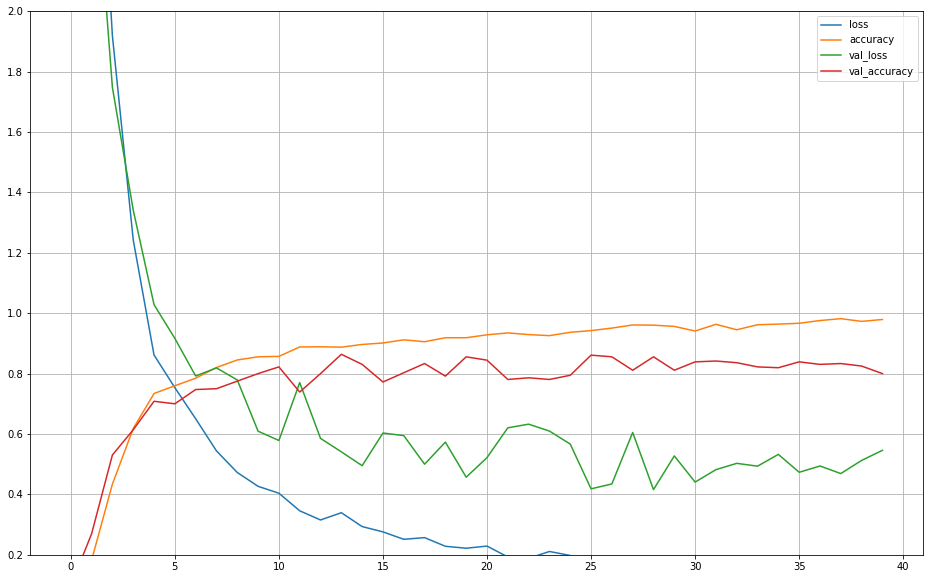

In [ ]:
pd.DataFrame(history.history).plot(figsize=(16,10))
plt.grid(True)
plt.gca().set_ylim(0.2,2)
plt.show

In [ ]:
a, acc = evaluar_modelo(model, X_betti_seq_test, y_test)
a, acc

62/62 [==============================] - 2s 32ms/step - loss: 0.4059 - accuracy: 0.8672


(0.4058787226676941, 0.8671755790710449)

In [ ]:
y_pred = model.predict(X_betti_seq_test)
                       
CM = tf.math.confusion_matrix(y_pred.argmax(axis=1), y_test)

fig = px.imshow(CM, color_continuous_scale="inferno")
fig.show()

In [ ]:
from keras.layers.merge import concatenate
def multichannel_model():
  #Channel 1
  inputs1 = keras.layers.Input(shape=(400,1))
  conv1 = keras.layers.Conv1D(32,4, activation="relu", padding="same")(inputs1)
  conv2 = keras.layers.Conv1D(32,5, activation="relu", padding="same")(conv1)
  drop1 = keras.layers.Dropout(0.4)(conv2)
  pool1 = keras.layers.MaxPooling1D(2)(drop1)
  flat1 = keras.layers.Flatten()(pool1)
  
  #Channel 2
  inputs2 = keras.layers.Input(shape=(400,1))
  conv1_2 = keras.layers.Conv1D(32, 7, activation="relu", padding="same")(inputs2)
  conv2_2 = keras.layers.Conv1D(32, 5, activation="relu", padding="same")(conv1_2)
  drop1_2 = keras.layers.Dropout(0.4)(conv2_2)
  pool1_2 = keras.layers.MaxPooling1D(2)(drop1_2)
  flat2 = keras.layers.Flatten()(pool1_2)

  merged = concatenate([flat1,flat2]) 

  #Artificial NN part

  dense1 = keras.layers.Dense(200, activation="relu")(merged)
  outputs = keras.layers.Dense(42, activation="softmax")(dense1)
  model = keras.models.Model(inputs=[inputs1,inputs2], outputs=outputs)
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  print(model.summary())
  return model

  


In [ ]:
def data_multichannel(X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY):
  #Creamos los canales para train y para test
  X_Betti_seq_trainX = [np.concatenate([X_BC_trainX[i,0], X_BC_trainX[i,1]]) for i in range(len(X_BC_trainX))]
  X_Betti_seq_trainY = [np.concatenate([X_BC_trainY[i,0], X_BC_trainY[i,1]]) for i in range(len(X_BC_trainY))]
  X_Betti_seq_testX = [np.concatenate([X_BC_testX[i,0], X_BC_testX[i,1]]) for i in range(len(X_BC_testX))]
  X_Betti_seq_testY = [np.concatenate([X_BC_testY[i,0], X_BC_testY[i,1]]) for i in range(len(X_BC_testY))]

  #estandarizamos

  X_betti_seq_trainX = [(X_Betti_seq_trainX[i] - np.mean(X_Betti_seq_trainX[i])) / np.std(X_Betti_seq_trainX[i]) for i in range(len(X_Betti_seq_trainX))]
  X_betti_seq_trainY = [(X_Betti_seq_trainY[i] - np.mean(X_Betti_seq_trainY[i])) / np.std(X_Betti_seq_trainY[i]) for i in range(len(X_Betti_seq_trainY))]
  X_betti_seq_testX = [(X_Betti_seq_testX[i] - np.mean(X_Betti_seq_testX[i])) / np.std(X_Betti_seq_testX[i]) for i in range(len(X_Betti_seq_testX))]
  X_betti_seq_testY = [(X_Betti_seq_testY[i] - np.mean(X_Betti_seq_testY[i])) / np.std(X_Betti_seq_testY[i]) for i in range(len(X_Betti_seq_testY))]

  return np.expand_dims(X_betti_seq_trainX, axis=-1), np.expand_dims(X_betti_seq_trainY, axis=-1), np.expand_dims(X_betti_seq_testX, axis=-1), np.expand_dims(X_betti_seq_testY, axis=-1)

In [ ]:
def data_multichannel_hom(X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY):
  X_Betti_seq_train0 = [np.concatenate([X_BC_trainX[i,0], X_BC_trainY[i,0]]) for i in range(len(X_BC_trainX))]
  X_Betti_seq_train1 = [np.concatenate([X_BC_trainX[i,1], X_BC_trainY[i,1]]) for i in range(len(X_BC_trainX))]
  X_Betti_seq_test0 = [np.concatenate([X_BC_testX[i,0], X_BC_testY[i,0]]) for i in range(len(X_BC_testX))]
  X_Betti_seq_test1 = [np.concatenate([X_BC_testX[i,1], X_BC_testY[i,1]]) for i in range(len(X_BC_testY))]

  #estandarizamos

  X_betti_seq_train0 = [(X_Betti_seq_train0[i] - np.mean(X_Betti_seq_train0[i])) / np.std(X_Betti_seq_train0[i]) for i in range(len(X_Betti_seq_train0))]
  X_betti_seq_train1 = [(X_Betti_seq_train1[i] - np.mean(X_Betti_seq_train1[i])) / np.std(X_Betti_seq_train1[i]) for i in range(len(X_Betti_seq_train1))]
  X_betti_seq_test0 = [(X_Betti_seq_test0[i] - np.mean(X_Betti_seq_test0[i])) / np.std(X_Betti_seq_test0[i]) for i in range(len(X_Betti_seq_test0))]
  X_betti_seq_test1 = [(X_Betti_seq_test1[i] - np.mean(X_Betti_seq_test1[i])) / np.std(X_Betti_seq_test1[i]) for i in range(len(X_Betti_seq_test1))]

  return np.expand_dims(X_betti_seq_train0, axis=-1), np.expand_dims(X_betti_seq_train1, axis=-1), np.expand_dims(X_betti_seq_test0, axis=-1), np.expand_dims(X_betti_seq_test1, axis=-1)


In [ ]:
X_betti_seq_train0, X_betti_seq_train1, X_betti_seq_test0, X_betti_seq_test1 = data_multichannel_hom(X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY)

In [ ]:
X_betti_seq_trainX, X_betti_seq_trainY, X_betti_seq_testX, X_betti_seq_testY = data_multichannel(X_BC_trainX, X_BC_trainY, X_BC_testX, X_BC_testY)

In [ ]:
model_multi = multichannel_model()

In [ ]:
history_multi = model_multi.fit([X_betti_seq_trainX,X_betti_seq_trainY], keras.utils.to_categorical(y_train), epochs=38, verbose=1, validation_split=0.2, batch_size=130)

Epoch 1/38
12/12 [==============================] - 3s 281ms/step - loss: 0.3733 - accuracy: 0.8757 - val_loss: 0.6390 - val_accuracy: 0.7944
Epoch 2/38
12/12 [==============================] - 3s 274ms/step - loss: 0.3844 - accuracy: 0.8604 - val_loss: 0.5977 - val_accuracy: 0.8194
Epoch 3/38
12/12 [==============================] - 3s 271ms/step - loss: 0.4264 - accuracy: 0.8632 - val_loss: 0.6425 - val_accuracy: 0.7944
Epoch 4/38
12/12 [==============================] - 3s 280ms/step - loss: 0.3608 - accuracy: 0.8736 - val_loss: 0.5991 - val_accuracy: 0.8083
Epoch 5/38
12/12 [==============================] - 3s 277ms/step - loss: 0.3428 - accuracy: 0.8861 - val_loss: 0.5957 - val_accuracy: 0.8111
Epoch 6/38
12/12 [==============================] - 3s 272ms/step - loss: 0.3236 - accuracy: 0.9007 - val_loss: 0.5399 - val_accuracy: 0.8278
Epoch 7/38
12/12 [==============================] - 3s 275ms/step - loss: 0.2881 - accuracy: 0.9083 - val_loss: 0.5425 - val_accuracy: 0.8278
Epoch 

<function matplotlib.pyplot.show>

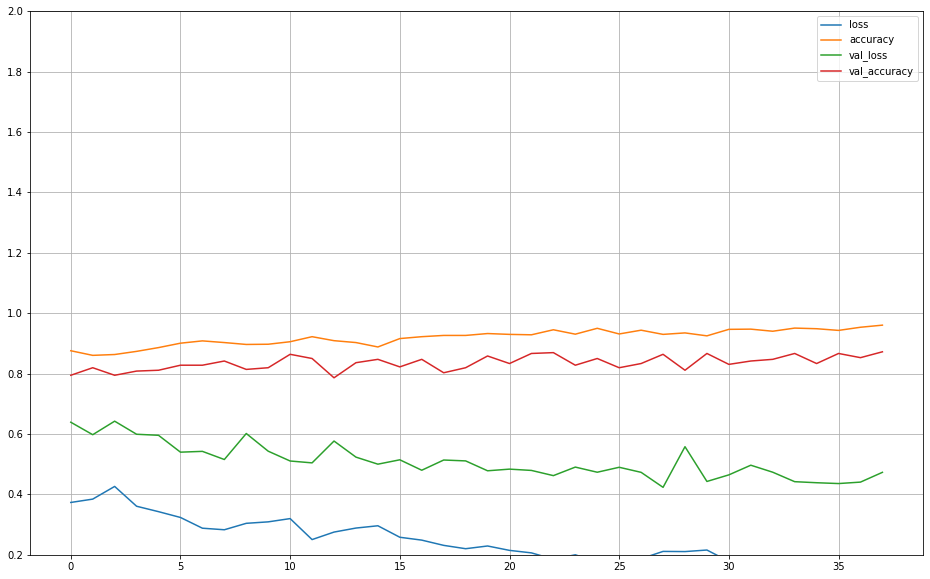

In [ ]:
pd.DataFrame(history_multi.history).plot(figsize=(16,10))
plt.grid(True)
plt.gca().set_ylim(0.2,2)
plt.show

In [ ]:
a, acc = model_multi.evaluate([X_betti_seq_testX, X_betti_seq_testY], keras.utils.to_categorical(y_test))
a, acc

62/62 [==============================] - 1s 20ms/step - loss: 0.4696 - accuracy: 0.8499


(0.46960946917533875, 0.8498727679252625)

In [ ]:
y_pred = model_multi.predict([X_betti_seq_testX, X_betti_seq_testY])
                       
CM = tf.math.confusion_matrix(y_pred.argmax(axis=1), y_test)

fig = px.imshow(CM, color_continuous_scale="inferno")
fig.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred.argmax(axis=1), y_test))

In [ ]:
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials

In [ ]:
kernel_units_options = np.arange(1, 120 + 1, 32, dtype=int)
kernel_size_options = np.arange(3, 12 + 1, 3, dtype=int)
dropout_options = np.arange(.20,.75 + 0.01, 0.025, dtype=float)
batchsize_options = np.arange(32, 128 + 1, 32, dtype=int)
epochs_options = np.arange(20, 50, 10, dtype=int)
MaxPool_options = np.arange(2, 10, 2, dtype=int)
dense_options = np.arange(100, 300, 30, dtype=int)
space = {
            'units1': hp.choice('units1', kernel_units_options),
            'units2': hp.choice('units2', kernel_units_options),
            'units3': hp.choice('units3', kernel_units_options),
            'units4': hp.choice('units4', kernel_units_options), 
            'size1':hp.choice('size1', kernel_size_options),
            'size2':hp.choice('size2', kernel_size_options),
            'size3':hp.choice('size3', kernel_size_options),
            'size4':hp.choice('size4', kernel_size_options),  
            'pool1': hp.choice('pool1', MaxPool_options),
            'pool2': hp.choice('pool2', MaxPool_options),            
            'dropout1': hp.choice('dropout1', dropout_options),
            'dropout2': hp.choice('dropout2', dropout_options),

            'batch_size' : hp.choice('batch_size', batchsize_options),

            'nb_epochs' :  hp.choice('epochs_options', epochs_options),
            'optimizer': hp.choice('optimizer',['adadelta','adam','sgd']),
            'dense': hp.choice('dense',dense_options)
        }

In [ ]:
from sklearn.model_selection import train_test_split

X_trainNX,X_valNX,y_trainNX,y_valNX=train_test_split(X_betti_seq_trainX,y_train, test_size=0.2,random_state=123)
X_trainNY,X_valNY,y_trainNY,y_valNY=train_test_split(X_betti_seq_trainY,y_train, test_size=0.2,random_state=123)

In [ ]:
for i in range(len(y_trainNY)):
  if(y_trainNY[i] != y_trainNX[i]):
    print(i)

In [ ]:
def f_nn(params):
  #Channel 1
  p1 = params['pool1']
  inputs1 = keras.layers.Input(shape=(400,1))
  conv1 = keras.layers.Conv1D(params['units1'],kernel_size={params['size1']}, activation="relu", padding="same")(inputs1)
  conv2 = keras.layers.Conv1D(params['units2'], kernel_size={params['size2']}, activation="relu", padding="same")(conv1)
  drop1 = keras.layers.Dropout(params['dropout1'])(conv2)
  pool1 = keras.layers.MaxPooling1D({params['pool1']})(drop1)
  flat1 = keras.layers.Flatten()(pool1)
  
  #Channel 2
  inputs2 = keras.layers.Input(shape=(400,1))
  conv1_2 = keras.layers.Conv1D(params['units3'], kernel_size={params['size3']}, activation="relu", padding="same")(inputs2)
  conv2_2 = keras.layers.Conv1D(params['units4'], kernel_size={params['size4']}, activation="relu", padding="same")(conv1_2)
  drop1_2 = keras.layers.Dropout(params['dropout2'])(conv2_2)
  pool1_2 = keras.layers.MaxPooling1D({params['pool2']})(drop1_2)
  flat2 = keras.layers.Flatten()(pool1_2)

  merged = concatenate([flat1,flat2]) 

  #Artificial NN part

  dense1 = keras.layers.Dense(params['dense'], activation="relu")(merged)
  outputs = keras.layers.Dense(42, activation="softmax")(dense1)
  modelS = keras.models.Model(inputs=[inputs1,inputs2], outputs=outputs)
  modelS.compile(loss="categorical_crossentropy", optimizer=params["optimizer"], metrics=["accuracy"])
  modelS.fit([X_betti_seq_trainX,X_betti_seq_trainY], keras.utils.to_categorical(y_train), epochs=params['nb_epochs'], verbose=0, batch_size=params['batch_size'])
  a, acc = modelS.evaluate([X_betti_seq_testX, X_betti_seq_testY], keras.utils.to_categorical(y_test))
  print("AUC: %.5f" % (acc))
  return {'loss': -acc, 'status': STATUS_OK}

In [ ]:
trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=40, trials=trials)
print('\nBest params found:\n', best)


with open('/content/drive/MyDrive/Data-Time_Series/Thorax/best.txt', 'w') as f:
    print(best, file=f)

In [ ]:
def Model_bayesian(X_betti_seq_trainX, X_betti_seq_trainY, X_betti_seq_testX, X_betti_seq_testY):
  #Channel 1
  inputs1 = keras.layers.Input(shape=(400,1))
  conv1 = keras.layers.Conv1D(33, 9, activation="relu", padding="same")(inputs1)
  conv2 = keras.layers.Conv1D(65, 3, activation="relu", padding="same")(conv1)
  drop1 = keras.layers.Dropout(0.4)(conv2)
  pool1 = keras.layers.MaxPooling1D(8)(drop1)
  flat1 = keras.layers.Flatten()(pool1)
  
  #Channel 2
  inputs2 = keras.layers.Input(shape=(400,1))
  conv1_2 = keras.layers.Conv1D(65, 6, activation="relu", padding="same")(inputs2)
  conv2_2 = keras.layers.Conv1D(97, 9, activation="relu", padding="same")(conv1_2)
  drop1_2 = keras.layers.Dropout(0.4)(conv2_2)
  pool1_2 = keras.layers.MaxPooling1D(4)(drop1_2)
  flat2 = keras.layers.Flatten()(pool1_2)

  merged = concatenate([flat1,flat2]) 

  #Artificial NN part

  dense1 = keras.layers.Dense(250, activation="relu")(merged)
  outputs = keras.layers.Dense(42, activation="softmax")(dense1)
  modelS = keras.models.Model(inputs=[inputs1,inputs2], outputs=outputs)
  modelS.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


  HistoryS = modelS.fit([X_betti_seq_trainX,X_betti_seq_trainY], keras.utils.to_categorical(y_train), epochs=30, verbose=1, batch_size=32, validation_split=0.2)
  a, acc = modelS.evaluate([X_betti_seq_testX, X_betti_seq_testY], keras.utils.to_categorical(y_test))
  return modelS, HistoryS

In [ ]:
ModelS, HistoryS = Model_bayesian(X_betti_seq_trainX, X_betti_seq_trainY, X_betti_seq_testX, X_betti_seq_testY)

Epoch 1/30
45/45 [==============================] - 11s 221ms/step - loss: 3.7451 - accuracy: 0.0306 - val_loss: 3.7034 - val_accuracy: 0.0222
Epoch 2/30
45/45 [==============================] - 10s 216ms/step - loss: 3.3651 - accuracy: 0.1118 - val_loss: 3.1184 - val_accuracy: 0.1944
Epoch 3/30
45/45 [==============================] - 10s 217ms/step - loss: 2.3964 - accuracy: 0.2889 - val_loss: 2.2788 - val_accuracy: 0.3944
Epoch 4/30
45/45 [==============================] - 10s 217ms/step - loss: 1.6380 - accuracy: 0.4986 - val_loss: 1.8702 - val_accuracy: 0.4861
Epoch 5/30
45/45 [==============================] - 10s 216ms/step - loss: 1.1775 - accuracy: 0.6299 - val_loss: 1.4511 - val_accuracy: 0.6500
Epoch 6/30
45/45 [==============================] - 10s 218ms/step - loss: 0.9301 - accuracy: 0.7007 - val_loss: 1.1896 - val_accuracy: 0.6639
Epoch 7/30
45/45 [==============================] - 10s 217ms/step - loss: 0.7841 - accuracy: 0.7306 - val_loss: 1.1016 - val_accuracy: 0.6611

<function matplotlib.pyplot.show>

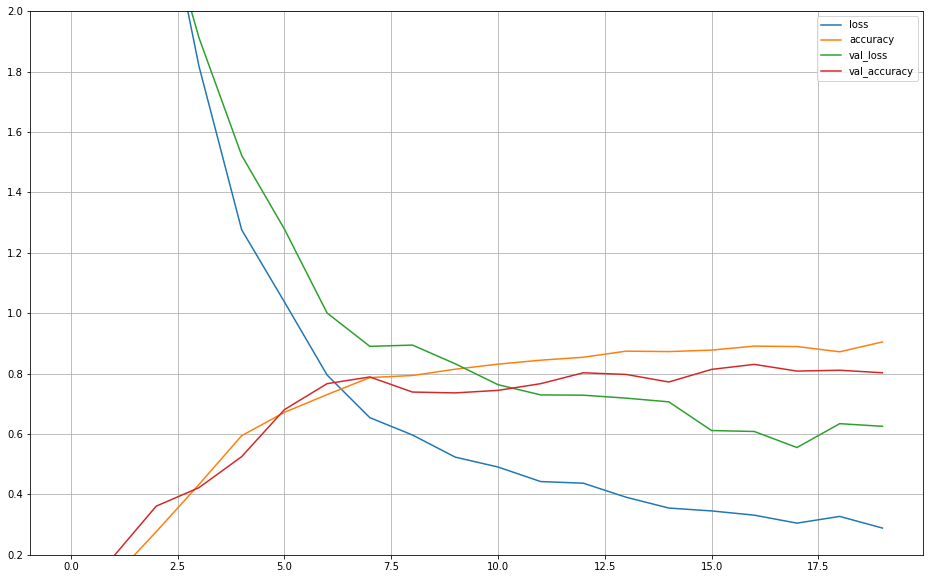

In [ ]:
pd.DataFrame(HistoryS.history).plot(figsize=(16,10))
plt.grid(True)
plt.gca().set_ylim(0.2,2)
plt.show